In [1]:
import numpy as np
#import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
pd.__version__

'1.0.1'

In [2]:
df = pd.read_csv('data_train.csv').values
df

array([[ 73,  80,  75, 152],
       [ 93,  88,  93, 185],
       [ 89,  91,  90, 180],
       [ 96,  98, 100, 196],
       [ 73,  66,  70, 142],
       [ 53,  46,  55, 101],
       [ 69,  74,  77, 149],
       [ 47,  56,  60, 115],
       [ 87,  79,  90, 175],
       [ 79,  70,  88, 164],
       [ 69,  70,  73, 141],
       [ 70,  65,  74, 141],
       [ 93,  95,  91, 184],
       [ 79,  80,  73, 152],
       [ 70,  73,  78, 148],
       [ 93,  89,  96, 192],
       [ 78,  75,  68, 147],
       [ 81,  90,  93, 183],
       [ 88,  92,  86, 177],
       [ 78,  83,  77, 159],
       [ 82,  86,  90, 177],
       [ 86,  82,  89, 175],
       [ 78,  83,  85, 175]])

In [3]:
def normal(X):
    return (X-np.mean(X))/(np.max(X)-np.mean(X))

In [4]:
x1 = df[:,0]
x2 = df[:,1]
x3 = df[:,2]

#x1 = normal(x1)
#x2 = normal(x2)
#x3 = normal(x3)

y_train = df[:,3]


In [5]:
x1.shape

(23,)

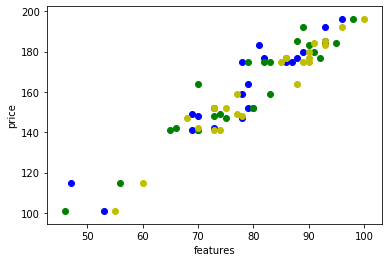

In [6]:
%matplotlib inline
plt.xlabel('features')
plt.ylabel('price')
plt.scatter(x1,y_train,c='b')
plt.scatter(x2,y_train,c='g')
plt.scatter(x3,y_train,c='y')
plt.show()

In [7]:
X_train = np.c_[np.ones((np.size(y_train),1)),x1,x2,x3]
X_train

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.]])

In [8]:
y_train = np.reshape(y_train,(-1,1))
print(X_train.shape, y_train.shape)


(23, 4) (23, 1)


In [9]:
def predict(x,theta):
    return np.dot(x, theta)

In [10]:
def error(x,y,theta):
    y_pre = predict(x,theta)
    return np.mean((y-y_pre)**2)

In [11]:
def compute_cost(x,y,theta,lambdaa):
    errors = error(x,y,theta)
    return 1/2*np.mean(errors) + lambdaa/2 *np.sum(theta.T@theta)

In [12]:
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 

In [13]:
def gradient_descent(x,y,theta,learning_rate,lambdaa):  
    cost_list = []
    theta_list = []
    m = np.size(y) 
    i=0
    cost_list.append(1e100)
    while 1:
        i+=1
        cost = compute_cost(x,y,theta,lambdaa)
        cost_list.append(cost)
        theta-= learning_rate*np.mean(np.dot(np.dot(x, theta) - y, x)) + lambdaa*theta
        theta_list.append(theta)
        print('iter',i,' ','loss',cost,' ', 'distance',cost_list[i-1] - cost_list[i])
        if cost_list[i-1] - cost_list[i] <= 1e-15:
            break
    return theta_list, cost_list

In [14]:
learning_rate = 0.0000001
theta = np.random.rand(4)  #initializing theta with some random values
lambdaa = 0
epoches = 20
batch_size = 80
#print(error(x_train, y_train,theta))


In [15]:
theta_list, cost_list = gradient_descent(X_train,y_train,theta,learning_rate,lambdaa)


iter 1   loss 873.7336491228314   distance 1e+100
iter 2   loss 852.1924767199112   distance 21.54117240292021
iter 3   loss 832.0776151426553   distance 20.11486157725585
iter 4   loss 813.2946237295553   distance 18.782991413100035
iter 5   loss 795.7553150413215   distance 17.539308688233746
iter 6   loss 779.3773408147767   distance 16.37797422654478
iter 7   loss 764.0838053320866   distance 15.293535482690118
iter 8   loss 749.8029043900631   distance 14.28090094202355
iter 9   loss 736.4675881744814   distance 13.335316215581656
iter 10   loss 724.0152464565815   distance 12.452341717899913
iter 11   loss 712.3874146337284   distance 11.627831822853068
iter 12   loss 701.529499234073   distance 10.85791539965544
iter 13   loss 691.3905215964394   distance 10.138977637633616
iter 14   loss 681.9228785219965   distance 9.46764307444289
iter 15   loss 673.0821187739588   distance 8.840759748037726
iter 16   loss 664.8267343759652   distance 8.255384397993566
iter 17   loss 657.1179

iter 237   loss 548.403394324273   distance 2.1952378119749483e-06
iter 238   loss 548.4033922743889   distance 2.0498840740401647e-06
iter 239   loss 548.4033903602343   distance 1.9141546090395423e-06
iter 240   loss 548.4033885728223   distance 1.7874119748739759e-06
iter 241   loss 548.4033869037603   distance 1.6690620441295323e-06
iter 242   loss 548.4033853452123   distance 1.5585479786750511e-06
iter 243   loss 548.403383889861   distance 1.4553513665305218e-06
iter 244   loss 548.4033825308733   distance 1.3589876743935747e-06
iter 245   loss 548.4033812618683   distance 1.2690049970842665e-06
iter 246   loss 548.4033800768884   distance 1.1849798511320841e-06
iter 247   loss 548.4033789703698   distance 1.1065186527048354e-06
iter 248   loss 548.4033779371175   distance 1.0332522606404382e-06
iter 249   loss 548.4033769722802   distance 9.648373406889732e-07
iter 250   loss 548.4033760713278   distance 9.009523864733637e-07
iter 251   loss 548.4033752300304   distance 8.41297

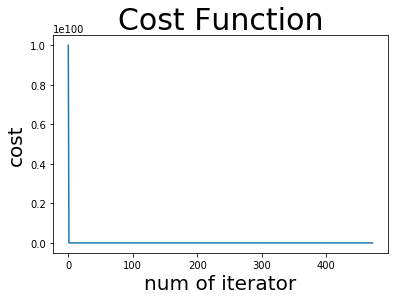

In [16]:
plt.title('Cost Function', size = 30)
plt.xlabel('num of iterator', size = 20)
plt.ylabel('cost', size = 20)
plt.plot(cost_list)
plt.show()

Ta suy ra theta

In [17]:
new_theta = theta_list[-1]
print(new_theta.shape)

(4,)


# Test

In [18]:
df_test = pd.read_csv('data_test.csv').values


In [19]:
x1_test = df_test[:,:1]
x2_test = df_test[:,1:2]
x3_test = df_test[:,2:3]

#x1_test = normal(x1_test)
#x2_test = normal(x2_test)
#x3_test = normal(x3_test)
y_test = df_test[:,3:4]
y_test.shape

(2, 1)

In [20]:

X_test = np.c_[np.ones((np.size(y_test),1)),x1_test,x2_test,x3_test]
X_test.shape

(2, 4)

In [21]:
Y_predict_from_test = predict(X_test,new_theta)
y_test = np.reshape(y_test,(1,-1))

In [22]:
print("ta du doan diem tu model",Y_predict_from_test) 
print("diem thuc te", y_test)

ta du doan diem tu model [154.99394141 187.25383271]
diem thuc te [[149 192]]
